## Chapter 4 -  Training Models

### Linear Regression

Linear regression is usually the first machine learning model in modern statistical learning. Although dull, it is widely used and serves as a good jumping-off point for newer approaches - many fancy statistical learning approaches can be seen as generalisations or extensions of linear regression. Hence, having a good understanding of linear regression before studying more complex learning methods cannot be overstated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Ingest, preprocessing
X = pd.read_csv('housing_X_feateng_complete.csv')
y = pd.read_csv('housing_y_feateng_complete.csv')
df = X.copy().join(y.copy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df_train = df.iloc[X_train.index].copy()
df_test = df.iloc[X_test.index].copy()

In [4]:
# For testing
# df.head()

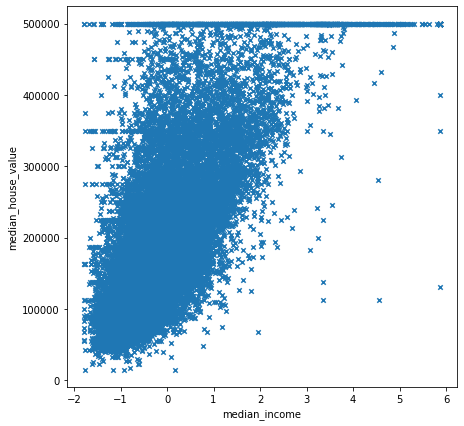

In [5]:
# Plot outcome on median income
fig, ax = plt.subplots(figsize=(7,7))
df.plot(kind='scatter', x='median_income', y='median_house_value', marker='x', ax=ax)
plt.show()

<b>Simple Linear Regression</b>

Given $n$ samples, the model assumes there is approximately a linear relationship between $X$ and $Y$. Mathematically, it is in the form:
$$
y \approx \beta_0 + \beta_1x
$$
$\beta_0$ and $\beta_1$ are model coefficients or parameters that need to be estimated. The estimated values are $\hat{\beta_0}$ and $\hat{\beta_1}$ and the predicted value of $y$, $\hat{y}$ is

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$ 

To obtain the parameter estimates, we find these values such that the mean squared error or MSE is minimised. Let the observations be represented in an $n$ by $p$ matrix, $\mathbf X$. The MSE is then calculated as

$$\begin{align}\text{MSE} (\mathbf X) &= \frac 1 n \sum_{i=1}^n \begin{bmatrix} \hat{y^{(i)}} - y^{(i)})\end{bmatrix}^2\\&= \frac 1 n \sum_{i=1}^n \begin{bmatrix} \hat{\beta_0} + \hat{\beta_1}x^{(i)}- y^{(i)})\end{bmatrix}^2\end{align}$$

Note that minimising the MSE is the same as minimising the residual sum of squares, RSS. This is because $\frac 1n \text{RSS} = \text{MSE}$

The closed-form solution of simple linear regression is:

$$
\hat{\beta_1} = 
\frac{\sum^n_{i=1}\begin{bmatrix}
\begin{pmatrix}
x_i-\bar{x}
\end{pmatrix}
\begin{pmatrix}
y_i-\bar{y}
\end{pmatrix}
\end{bmatrix}}
{\sum^n_{i=1}\begin{pmatrix}x_i - \bar{x}\end{pmatrix}^2}
$$
and 
$$
\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x} 
$$
where $\bar{x} = \frac {\sum_i x}{n}$ and $\bar{y} = \frac {\sum_i y}{N}$, the respective sample means. They are also considered the least-squares coefficient estimates for simple linear regression.

In [6]:
X_train1 = np.c_[np.ones((X_train.shape[0],1)), X_train.iloc[:,7]] # Add x0=1

In [7]:
# Obtaining the coefficients using the closed-form solution
df_train1 = df_train.iloc[:,[7,-1]].copy()
df_train1['median_income_mean'] = df_train1['median_income'].mean()
df_train1['median_house_value_mean'] = df_train1['median_house_value'].mean()
df_train1['model_beta1_xmxbar'] = df_train1['median_income'] - df_train1['median_income_mean']
df_train1['model_beta1_ymybar'] = df_train1['median_house_value'] - df_train1['median_house_value_mean']
df_train1['model_beta1_numer'] = df_train1['model_beta1_xmxbar'] * df_train1['model_beta1_ymybar']
df_train1['model_beta1_denom'] = df_train1['model_beta1_xmxbar']**2
df_train1[['model_beta1_numer', 'model_beta1_denom']].head()
beta1 = df_train1['model_beta1_numer'].sum()/df_train1['model_beta1_denom'].sum()
beta0 = df_train1['median_house_value'].mean()-beta1*df_train1['median_income'].mean()
print([beta0, beta1])

[207013.36663597767, 79851.70958249833]


In [10]:
# For simple linear regression, obtain the coefficients using the normal equations
Theta_hat1 = np.dot(np.dot(np.linalg.inv(np.dot(X_train1.T, X_train1)), X_train1.T),y_train)
print(Theta_hat1)

[[207013.36663598]
 [ 79851.7095825 ]]


In [8]:
# Obtaining the coefficients using sklearn
reg = LinearRegression()
reg.fit(X_train1, y_train)
print(reg.intercept_, reg.coef_)

[207013.36663598] [[    0.        79851.7095825]]


In [9]:
# Predict
X_test1 = np.c_[np.ones((X_test.shape[0],1)), X_test.iloc[:,7]] # Add x0=1
print(reg.predict(X_test1[:2]))
print(y_test[:2])

[[218829.83059812]
 [287249.80945645]]
       median_house_value
14740            136900.0
10101            241300.0


<b>Multiple Linear Regression</b>

The multiple linear regression model extends the simple linear model. It is in the form:

$$
y \approx \beta_0 + \beta_1x_{1} + \beta_2x_{2}+ \cdots + \beta_px_{p}
$$

where $p$ is the number of features, $x_{j}$ is the value of the $j$th feature for the sample and $\beta_j$ is the corresponding model coefficient for that feature. Letting $\Theta = (\beta_1, \cdots, \beta_p)^T$ and $\mathbf x = (x_1, \cdots, x_p)^T$, we can use the more concise notation:

$$
y = \Theta^T \mathbf x
$$
Where $\Theta$ is the parameter column vector containing $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$. and $\mathbf x_i$ is the feature column vector containing $x_{ti}$ for the $i$th sample.

To obtain $\hat{\Theta}$, we use the same approach as simple linear regression. Find values $\hat{\beta_0}, \cdots, \hat{\beta_p}$ to minimise the MSE (and consequently RSS):

$$\begin{align}\text{MSE} (\mathbf X) &= \frac 1 n \sum_{i=1}^n \begin{bmatrix} \hat{y^{(i)}} - y^{(i)})\end{bmatrix}^2\\&= \frac 1 n \sum_{i=1}^n \begin{bmatrix} \hat{\beta_0} + \hat{\beta_1}x^{(i)}_1 + \hat{\beta_2}x^{(i)}_2 + \cdots + \hat{\beta_p}x^{(i)}_p - y^{(i)})\end{bmatrix}^2\end{align}$$

The closed-form solution for multiple linear regression is the normal equation. Let $\mathbf y = (y^{(1)}, \cdots, y^{(n)})^T$:

$$\hat{\Theta} = (\mathbf X ^T \mathbf X)^{-1} \mathbf X^T \mathbf y$$

In [11]:
X_train2 = np.c_[np.ones((X_train.shape[0],1)), 
                 X_train[['median_income', 'INLAND', 'population_per_household']]] # Add x0=1

In [12]:
# For multiple linear regression, obtain the coefficients using the normal equations
Theta_hat2 = np.dot(np.dot(np.linalg.inv(np.dot(X_train2.T, X_train2)), X_train2.T),y_train)
print(Theta_hat2)

[[233430.47778361]
 [ 70358.36101743]
 [-83428.89496995]
 [ -5450.60905445]]


In [13]:
# Obtaining the coefficients using sklearn
reg2 = LinearRegression()
reg2.fit(X_train2, y_train)
print(reg2.intercept_, reg2.coef_)

[233430.47778361] [[     0.          70358.36101743 -83428.89496995  -5450.60905445]]


In [14]:
# Predict
X_test2 = np.c_[np.ones((X_test.shape[0],1)), 
                X_test[['median_income', 'INLAND', 'population_per_household']]] # Add x0=1
print(reg2.predict(X_test2[:2]))
print(y_test[:2])

[[243259.60449595]
 [304153.90288807]]
       median_house_value
14740            136900.0
10101            241300.0


### Validity of the Coefficient Estimates

The model assumes that the true relationship between $x$ and $y$ is $y=f(x)+\epsilon$ where $\epsilon$ is a mean-zero random error term. For univariate linear regression,
$$y = f(x) + \epsilon =\beta_0 + \beta_1x_1 + \epsilon$$ 

and for multivariate linear regression with $p$ variables, 
$$y=f(x) + \epsilon = \beta_0 + \beta_1x_{1} + \beta_2x_{2}+ \cdots + \beta_px_{p} + \epsilon$$ 

Hence, for the univariate case, $p=1$. 

Here, $\beta_0$ is the intercept term - the value of $y$ when $x_j=0 \,\,\forall j \in \{1,\cdots,p\}$ for the multivariate case. $\beta_j$ is the average increase in $y$ associated with one unit increase in $x_j$. The error term is a catch-all for what is missed with the model: there may be other variables that cause a variation in $y$, and there may be measurement error. This error term is independent of the $x_j$.

This model is the population regression line, and the linear approximation model with parameters $\hat{\beta_0}, \hat{\beta_1}, \cdots$ is the least squares line. The true relationship is <u>generally not known</u> and is estimated from the observed data. Fundamentally, we are <u>using observations from an experiment to estimate characteristics of a large population</u>.


If we use the sample mean $\hat{\mu}$ to estimate the population mean $\mu$, we say the estimate is unbiased. On average (across many estimates), we expect $\hat{\mu}=\mu$. Specifically, when we measure $\hat{\mu}$ many times and average the estimates, we will get an average that exactly equals $\mu$. Hence, an unbiased estimator does not systematically overestimate or underestimate the true parameter. This holds for the least squares estimates in this model.

If some estimates are above and some are below the true parameter $\mu$, how, then can we establish how far is a single estimate $\hat\mu$ from the true parameter? We use the standard error of $\hat\mu$, $\text{SE}(\hat\mu)$ to help us:

$$\text{Var}(\hat\mu) = \text{SE}(\hat\mu)^2 = \frac{\sigma^2}{n}$$

where $\sigma$ is the population standard deviation. Observe from the formula that the standard error decreases as $n$ increases. The more observations we have in a sample, the smaller the standard error of $\hat\mu$. For univariate linear regression, we want to compute the standard errors associated with $\hat{\beta_0}$ and $\hat{\beta_1}$ and they are:

$$\text{SE}(\beta_0)^2 = \sigma^2\begin{bmatrix}\frac 1n + \frac{\bar x^2}{\sum_{i=1}^n(x-\bar x)^2}\end{bmatrix}$$

$$\text{SE}(\beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n(x-\bar x)^2}$$

where $\sigma^2 = \text{Var}(\epsilon)$. The assumption is that the errors $\epsilon_i$ for each observation is uncorrelated and have the same variance $\sigma^2$. $\sigma^2$ can be estimated from the data and it is known as the <u>residual standard error</u>, RSE and is given by the formula
$$\text{RSE} = \sqrt{\frac{\text{RSS}}{n-2}}$$

Assuming that the standard errors are Gaussian distributed, Standard errors can be used to compute confidence intervals. a 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter. The range is defined as the lower and upper limits computed from the sample of data. For linear regression, the 95% C.I. for $\beta_1$ is:

$$\beta_1 \pm 2\times \text{SE}(\hat{\beta_1})$$

and thus there is a 95% chance that the true value of $\beta_1$ lies in the interval:

$$\begin{bmatrix}\beta_1 - 2\times \text{SE}(\hat{\beta_1}), \beta_1 + 2\times \text{SE}(\hat{\beta_1})\end{bmatrix}$$

Similarly, the confidence interval for $\beta_0$ is:
$$\begin{bmatrix}\beta_0 - 2\times \text{SE}(\hat{\beta_0}), \beta_1 + 2\times \text{SE}(\hat{\beta_0})\end{bmatrix}$$

(Strictly speaking, the value $2$ in the above equations should be substituted with the 97.5% quantile of a $t$-distribution with $n-2$ degrees of freedom.)

Standard errors can also be used to perform hypothesis testing on the coefficients. The null and alternative hypothesis are:
$$H_0:\text{There is no relationship between }x\text{ and }y$$
$$H_1:\text{There is some relationship between }x\text{ and }y$$

Mathematically, 
$$H_0:\beta_1=0$$
$$H_1:\beta_1 \neq 0$$

If the null is true, then the model simply reduces to $y=\beta_0 + \epsilon$, with the conclusion that there is no relationship. How large must $\beta_1$ be to reject the null? It depends on $\text{SE}(\hat{\beta_1})$, relative to (\hat{\beta_1}). For a some value of $\text{SE}(\hat{\beta_1})$, the estimate $\hat \beta_1$ must be large enough to reject the null hypothesis. To illustrate this, calculate the test statistic, in this case the $t$-statistic:

$$t=\frac{\hat{\beta_1}-0}{\text{SE}(\beta_1)}$$

which measures how many standard deviations is $\hat \beta_1$ from $0$. Consequently, the $p$-value is the probability of observing a value larger than or equal to $|t|$, given the null hypothesis is true. 

A small $p$-value indicates that it is <u>unlikely to observe no relationship</u> between $x$ and $y$, and we can infer that there is indeed a relationship between the variables and the predictor. We reject the null hypothesis and conclude that there is indeed a relationship between the variables and the response.

In the following example:
<img src="s1.png" width="500" />

Observe that the coefficients are large relative to their standard errors. So the $t$-statistics are large and the $p$-values are small. This means the chance of observing $\beta_0=0$, and $\beta_1=0$ are extremely small. Hence, we can conclude that $\beta_0\neq0$, and $\beta_1\neq0$ and there is indeed a relationship between TV and advertising.

### Accuracy of the Model

### Gradient Descent - Batch Gradient Descent

Gradient descent is a generic optimization problem capable of finding optimal solutions to many problems. The idea is to tweak parameters iteratively to minimize a cost function. 

- Note that when using gradient descent, the features must have a similar scale or it will take longer to converge.

Hence, to use gradient descent on a linear regression problem, we revisit the cost function, the MSE: $\text{MSE} (\Theta) = \frac 1 m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix}^2$ and now compute the gradient w.r.t. the parameters $\theta_t$. Each expression is the partial derivative for every parameter $\theta_t$.
$$\frac{\partial}{\partial \theta_j}\text{MSE}(\theta_t) = \frac 2m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_j^{(i)}$$

Combining them all, we obtain the gradient vector of the cost function:

$$\nabla_\theta \text{MSE}(\Theta) = \begin{bmatrix}\frac{\partial}{\partial \theta_0}\text{MSE}(\Theta)\\\frac{\partial}{\partial \theta_j}\text{MSE}(\Theta)\\\ \vdots\\\frac{\partial}{\partial \Theta}\text{MSE}(\theta_j)\end{bmatrix}= \begin{bmatrix}\frac 2m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_0^{(i)}\\\frac 2m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_1^{(i)}\\\ \vdots\\\frac 2m \sum_{i=1}^m \begin{bmatrix} \Theta^T \mathbf x^{(i)} - y^{(i)})\end{bmatrix} x_n^{(i)}\end{bmatrix} = \frac 2m \mathbf X^T (X\Theta - y)$$

Hence, after going through the batch once, calculate the gradient vector $\nabla_\theta \text{MSE}(\Theta)$ and multiply by the learning rate $\eta$, and update the parameter vector:

$$\Theta^{\text{new}} = \Theta - \eta \nabla_\theta \text{MSE}(\Theta)$$

In [ ]:
eta = 0.1 # learning rate
n_iterations = 200
m = X_train2.shape[0]
theta_hat2gd = np.random.normal(0,1,X_train2.shape[1])
print(theta_hat2gd)

In [ ]:
for itn in range(n_iterations):
    gradients = 2/m * np.dot(X_train2.T, np.dot(X_train2, theta_hat2gd) - np.array(y_train).reshape(-1))
    theta_hat2gd = theta_hat2gd - eta * gradients


In [ ]:
print(theta_hat2gd)
# Verify with normal equations
print(Theta_hat2.reshape(-1))

And it can be verified that the values obtained via gradient descent is the same as that of the normal equations.

### Gradient Descent - Stochastic Gradient Descent

Batch gradient descent uses the whole training set when running every epoch. In contrast, Stochastic gradient descent picks a random sample from the training set at every epoch and computes the gradients based only on that single instance.

In [ ]:
eta = 0.1 # learning rate
n_epochs = 50
m = 100
theta_hat3 = np.random.normal(0,1,2)
print(theta_hat3)

By convention, we iterate by rounds of $m$ iterations, and each round is called an epoch. 

In [ ]:
def learning_schedule(t):
    t0, t1 = 5,50
    return t0/(t+t1)

for eph in range(n_epochs):
    for i in range(m):
        ri = np.random.randint(m)
        X_i, y_i = X_b[ri:ri+1], y[ri:ri+1]
        np.dot(X_b.T, np.dot(X_b, theta_hat2) - y)
        gradients = 2* np.dot(X_i.T, np.dot(X_i, theta_hat3) - y_i) 
        eta = learning_schedule(eph * m + i)
        theta_hat3 = theta_hat3 - eta * gradients
print(theta_hat3)
# Verify with normal equations
print(Theta_hat)

In [ ]:
# The equivalent in sklearn is:

# Train
reg2 = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1)
reg2.fit(X_b, df_Xy['y'])
print(np.c_[reg2.intercept_, [0]][0] + reg2.coef_)
# Predict
print(reg2.predict(lin_X_b[:4]))

In [ ]:
# Comparisons of all covered:
print(Theta_hat) # Normal Equations
print(reg.intercept_, reg.coef_) # sklearn.LinearRegression
print(theta_hat2) # Batch Gradient Descent
print(np.c_[reg2.intercept_, [0]][0] + reg2.coef_) # SGD Regressor